### Example 5.13 (A Family of Permutations with Restricted Cycles)
Illustrating a local central limit theorem for a family of permutations.  
*Requirements: None*

In [1]:
# Code to compute needed Hessian
def getHess(d,h,var):
    hes = matrix(SR,d)
    for i in range(d):
        for j in range(d):
            hes[i,j] = var^(i+j+2)*((-3-i-j)*diff(h,var)+var*diff(h,var,var))/diff(h,var)^3;
            if i == j:
                hes[i,j] = hes[i,j] - var^(i+1)/diff(h,var)
    return hes

# Compute minimal root of h = H(1,..,1,t) and asymptotic behaviour described below (using formula from text)
def domAsm(d):
    h = 1 - add([t^k for k in range(1,d+1)])
    HES = getHess(d-1,h,t).factor()
    ASM = -(1/t)^n*sqrt((2*pi*n)^(1-d))/sqrt(HES.determinant())/t/diff(h,t)
    pp = QQbar[t](h)
    alpha = min([k for k in pp.roots(multiplicities = False) if k.imag()==0 and k>0])
    return alpha, ASM.subs(t=alpha)

### Dimension 2 Case

In [2]:
# Define denominator H(x,t) and the polynomial h = H(1,...,1,t)
var('n,x,t')
H = 1 - t - x*t^2
F = 1/H

# Set dimension d = 2 and compute dominant asymptotics of largest coeff in [t^n]F(x,t)
d = 2
alpha, ASM = domAsm(d)

# Set index to plot
N = 200

# Get direction with central limit theorem and index of maximum coefficient of [t^N]F(1,x)
h = H.subs(x=1)

# Get index of maximum coefficient
m = [(-t^(k+1)/t/diff(h,t)).subs(t=alpha) for k in range(1,d)] + [1]
m0 = round(m[0]*N)

# Get series expansion
ser = ZZ[x](F.taylor((x,0),(t,0),2*N+1).coefficient(t,N))

# Get limiting distribution
var('e0')
hes = getHess(d-1,h,t)[0,0].subs(t=alpha)
norm = exp(-n*(e0^2/hes/2))

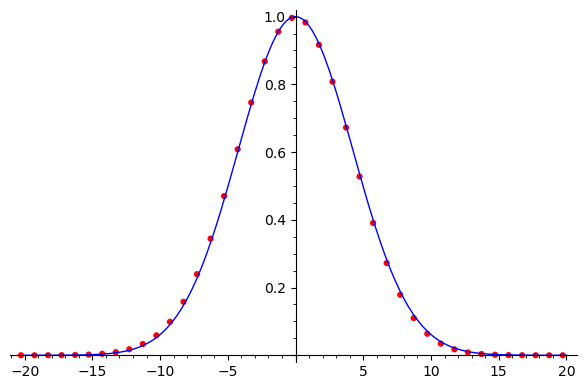

In [3]:
# Plot series coefficients of [t^n]F(x,t) compared to limit distribution
pt = point([[k-m0/N,ser[m0+k]/ASM.subs(n=N)] for k in range(-20,21)], color='red', size=20)
pt += plot(norm.subs(e0=e0/N).subs(n=N),e0,-20,20)
pt

### Dimension 3 Case

In [4]:
# Define denominator H(x,t) and the polynomial h = H(1,...,1,t)
var('n,x,y,t')
H = 1 - t - x*t^2 - y*t^3
F = 1/H

# Set dimension d = 3 and compute dominant asymptotics of largest coeff in [t^n]F(x,y,t)
d = 3
alpha, ASM = domAsm(d)

# Set index to plot
N = 80

# Get direction with central limit theorem and index of maximum coefficient of [t^N]F(1,x)
h = H.subs(x=1,y=1)

# Get index of maximum coefficient
m = [(-t^(k+1)/t/diff(h,t)).subs(t=alpha) for k in range(1,d)] + [1]
m0 = round(m[0]*N)
m1 = round(m[1]*N)

# Get series expansion
ser = ZZ[x,y](F.taylor((x,0),(y,0),(t,0),3*N+1).coefficient(t,N))

# Get limiting distribution
var('e0,e1')
hes = getHess(d-1,h,t).subs(t=alpha)
ee = Matrix([e0,e1])
norm = exp(-n*(ee * hes.inverse() * ee.transpose())[0,0]/2)

In [5]:
# Plot series coefficients of [t^n]F(x,y,t) compared to limit distribution
pt = point([[i+m0/N,j+m1/N,ser[m0+i,m1+j]/ASM.subs(n=N)] for i in range(-6,6) for j in range(-6,6)], size=100, color='red')
pt += plot3d(norm.subs(n=N,e0=e0/N,e1=e1/N),(e0,-8,8),(e1,-8,8), aspect_ratio=[1,1,10])
pt

Graphics3d Object